### Ibad Ur Rahman
### 23MDBCS421
### Data Science
### Semester 5th
### Lab Task 5
### Dr.Tariq Sadad

Cell 1 – Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


Cell 2 – Load dataset

In [5]:
# Load dataset
df = pd.read_csv("social-media.csv")

# Fix column name
df.rename(columns={"UsageDuraiton": "UsageDuration"}, inplace=True)

df.head()


,UserId,UsageDuration,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2


Cell 3 – Dataset info

In [6]:
# Dataset information
print("Dataset Info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserId         63 non-null     int64 
 1   UsageDuration  63 non-null     int64 
 2   Age            63 non-null     int64 
 3   Country        63 non-null     object
 4   TotalLikes     63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB
None

Summary statistics:
          UserId  UsageDuration        Age  TotalLikes
count  63.000000      63.000000  63.000000   63.000000
mean   31.761905       4.000000  33.777778    5.317460
std    18.015866       2.879292  15.540213    6.135106
min     1.000000       1.000000  18.000000    0.000000
25%    16.500000       2.000000  19.000000    1.500000
50%    32.000000       3.000000  26.000000    4.000000
75%    47.500000       5.000000  50.000000    6.000000
max    62.000000      13.000000  60.000000   28.000000


Cell 4 – Define features and target

In [7]:
# Features & Target
X = df[["UsageDuration", "Age"]]   # independent variables
y = df["TotalLikes"]               # dependent variable

X.head(), y.head()


(   UsageDuration  Age
 0              2   55
 1              6   45
 2              3   50
 3              4   35
 4              1   58,
 0     5
 1    10
 2     7
 3     5
 4     2
 Name: TotalLikes, dtype: int64)

Cell 5 – Train-test split

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
(X_train.shape, X_test.shape)


((50, 2), (13, 2))

Cell 6 – Train model

In [9]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


Cell 7 – Predictions

In [10]:
# Predictions
y_pred = model.predict(X_test)
y_pred[:10]


array([ 9.94215157,  2.24330497,  2.24330497,  3.3205827 , 13.72590521,
        8.99621316,  2.33065182,  5.86724179,  2.47622989,  3.26235147])

Cell 8 – Evaluation

In [11]:
# Model evaluation
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Coefficients: [ 0.94593841 -0.02911561]
Intercept: 1.9527869328534697
Mean Squared Error: 59.04559655526692
R² Score: 0.37453266780493233


Cell 9 – Visualization

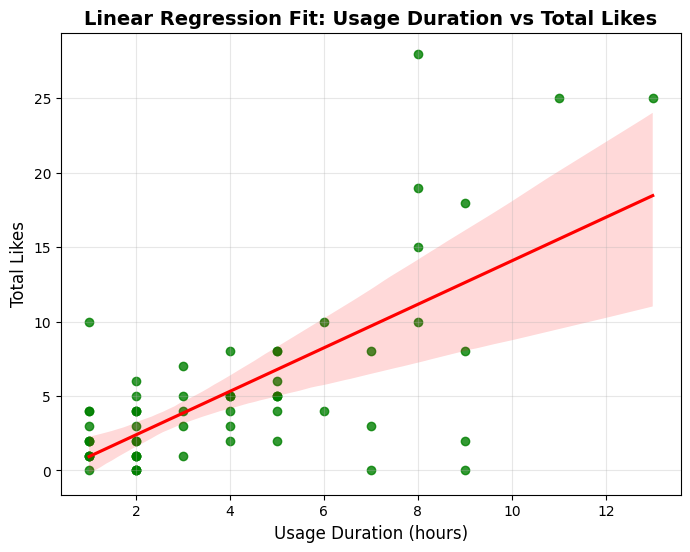

In [20]:
# Scatter + regression line for UsageDuration vs TotalLikes
plt.figure(figsize=(8,6))
sns.regplot(x="UsageDuration", y="TotalLikes", data=df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel("Usage Duration (hours)", fontsize=12)
plt.ylabel("Total Likes", fontsize=12)
plt.title("Linear Regression Fit: Usage Duration vs Total Likes", fontsize=14, weight="bold")
plt.grid(alpha=0.3)
plt.show()

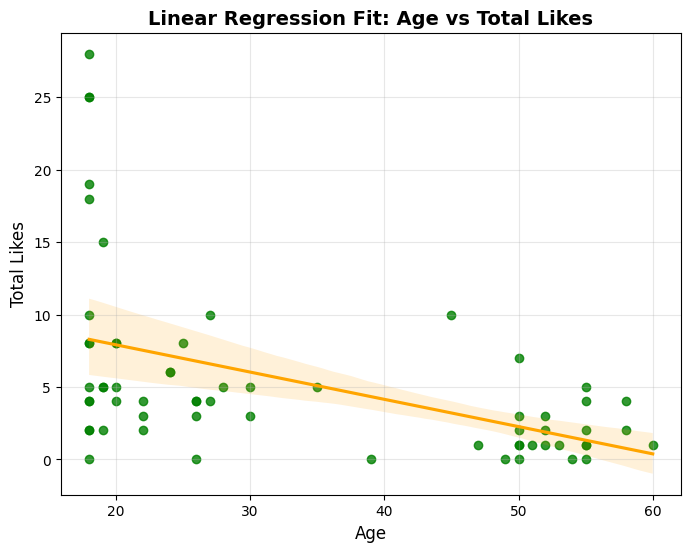

In [16]:
plt.figure(figsize=(8,6))
sns.regplot(x="Age", y="TotalLikes", data=df, scatter_kws={'color':'green'}, line_kws={'color':'orange'})
plt.xlabel("Age", fontsize=12)
plt.ylabel("Total Likes", fontsize=12)
plt.title("Linear Regression Fit: Age vs Total Likes", fontsize=14, weight="bold")
plt.grid(alpha=0.3)
plt.show()

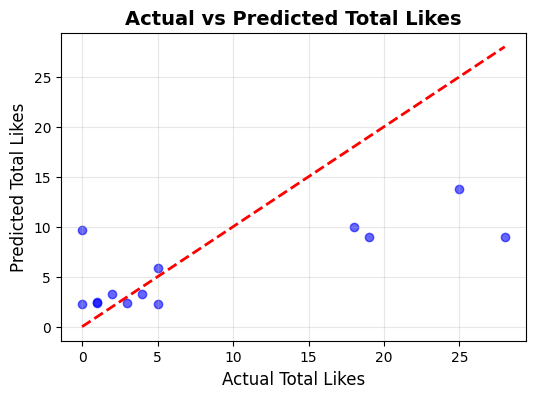

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Total Likes", fontsize=12)
plt.ylabel("Predicted Total Likes", fontsize=12)
plt.title("Actual vs Predicted Total Likes", fontsize=14, weight="bold")
plt.grid(alpha=0.3)
plt.show()


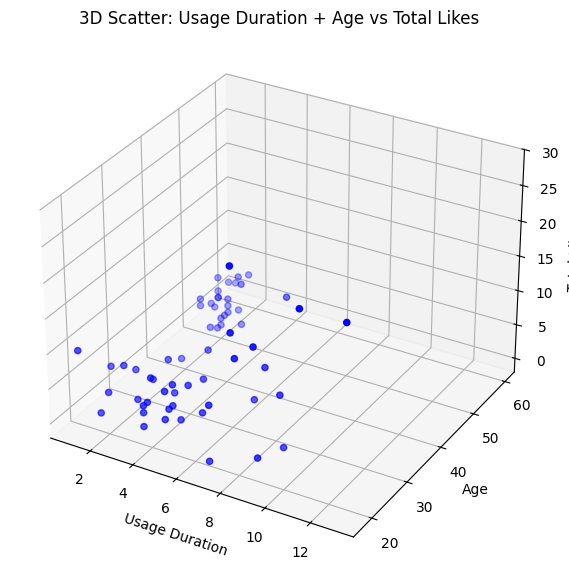

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["UsageDuration"], df["Age"], df["TotalLikes"], c="blue", marker="o")

ax.set_xlabel("Usage Duration")
ax.set_ylabel("Age")
ax.set_zlabel("Total Likes")
ax.set_title("3D Scatter: Usage Duration + Age vs Total Likes")

plt.show()


In [ ]:
single_prediction = model.predict([[30, 25]])
print("Single Prediction for UsageDuration=30 and Age=25:", single_prediction)  
# Single prediction




Single Prediction for UsageDuration=30 and Age=25: [29.60304889]
